In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import modeling
from scipy.optimize import curve_fit
from astropy import wcs
from astropy.wcs import WCS
from ROHSApy import ROHSA
from skimage.draw import polygon2mask
from skimage.draw import polygon
from skimage.restoration import inpaint

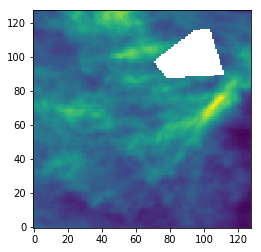

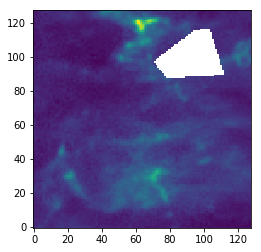

In [4]:
fitsname = "test_cube.fits"
hdu = fits.open(fitsname)
hdr = hdu[0].header
cube = hdu[0].data

#LVC IS LOCATED AT 
#cube = hdu[0].data[0][300:350, :, :]
#IVC IS LOCATED AT 
#cube = hdu[0].data[0][360:420, :, :]

#The data from the cube was plotted

#plt.imshow(np.sum(cube, axis = 0), origin="lower", cmap="inferno")
#plt.show()

np.shape(cube)
plt.imshow(np.sum(cube, 0), origin = 'lower')
plt.show()

plt.imshow(cube[100], origin = 'lower')
plt.show()


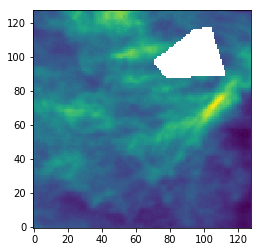

(135, 128, 128)


In [3]:
fitsname = "GHIGLS_NCPL_Tb_MASKED.fits"
hdu1 = fits.open(fitsname)
hdr1 = hdu1[0].header
cube1 = hdu1[0].data

#LVC IS LOCATED AT 
#cube = hdu[0].data[0][300:350, :, :]
#IVC IS LOCATED AT 
#cube = hdu[0].data[0][360:420, :, :]

#The data from the cube was plotted

#plt.imshow(np.sum(cube, axis = 0), origin="lower", cmap="inferno")
#plt.show()

#np.shape(cube)
#plt.imshow(np.sum(cube, 0), origin = 'lower')
#plt.show()

plt.imshow(np.sum(cube1, 0), origin = 'lower')
plt.show()
print(np.shape(cube1))

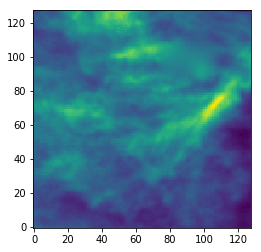

In [4]:
fitsname = "GHIGLS_NCPL_Tb_INPAINTED.fits"
hdu2 = fits.open(fitsname)
hdr2 = hdu2[0].header
cube2 = hdu2[0].data

#LVC IS LOCATED AT 
#cube = hdu[0].data[0][300:350, :, :]
#IVC IS LOCATED AT 
#cube = hdu[0].data[0][360:420, :, :]

#The data from the cube was plotted

#plt.imshow(np.sum(cube, axis = 0), origin="lower", cmap="inferno")
#plt.show()

#np.shape(cube)
#plt.imshow(np.sum(cube, 0), origin = 'lower')
#plt.show()

plt.imshow(np.sum(cube2, 0), origin = 'lower')
plt.show()

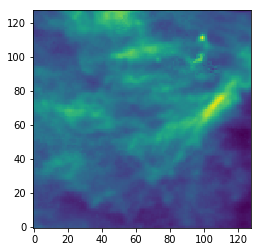

In [10]:
fitsname = "GHIGLS_NCPL_Tb_CROPPED.fits"
hdu3 = fits.open(fitsname)
hdr3 = hdu3[0].header
cube3 = hdu3[0].data

#LVC IS LOCATED AT 
#cube = hdu[0].data[0][300:350, :, :]
#IVC IS LOCATED AT 
#cube = hdu[0].data[0][360:420, :, :]

#The data from the cube was plotted

#plt.imshow(np.sum(cube, axis = 0), origin="lower", cmap="inferno")
#plt.show()

#np.shape(cube)
#plt.imshow(np.sum(cube, 0), origin = 'lower')
#plt.show()

plt.imshow(np.sum(cube3, 0), origin = 'lower')
plt.show()

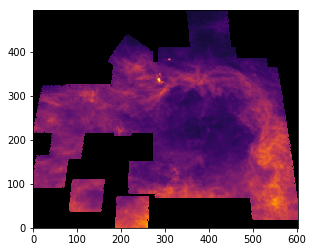

In [16]:
fitsname = "GHIGLS_NCPL_Tb.fits"
hdu4 = fits.open(fitsname)
hdr4 = hdu4[0].header
#CRPIX1 is the x axis (RA), CRPIX2 is the y axis (DEC)


hdr_copy = np.copy(hdr)
#cube = hdu[0].data[0][300:420,218:345, 189:316]
cube = hdu4[0].data[0]


def wcs2D(hdr4):
    w = wcs.WCS(naxis=2)
    w.wcs.crpix = [hdr4['CRPIX1'], hdr4['CRPIX2']]
    w.wcs.cdelt = np.array([hdr4['CDELT1'], hdr4['CDELT2']])
    w.wcs.crval = [hdr4['CRVAL1'], hdr4['CRVAL2']]
    w.wcs.ctype = [hdr4['CTYPE1'], hdr4['CTYPE2']]
    return w
w = wcs2D(hdr4)


#rms = hdu[2].data[50:82, 80:112]
#mask = hdu[1].data
#LVC IS LOCATED AT 
#cube = hdu[0].data[0][300:350, :, :]
#IVC IS LOCATED AT 
#cube = hdu[0].data[0][360:420, :, :]

#The data from the cube was plotted

plt.imshow(np.sum(cube[:, :, :],0), origin="lower", cmap="inferno")
plt.show()


In [17]:
np.shape(np.sum(cube, 0))

(495, 603)

(495, 603)


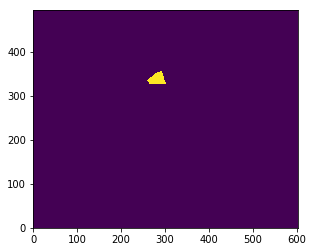

In [22]:
#these are just the components of the polygon broken up into their l and b components
l = [140.8102, 141.52, 141.89545,142.34,143.23855 ,144.169, 143.48741,  140.8102 ]
b = [40.37, 42.02, 42.02, 41.95,41.391253, 40.88, 40.282919, 40.37 ]

x,y = w.wcs_world2pix(l,b, 0)

#i had to invert the x,y coordinates when stacking in order to properly orient the mask
polygon_pix = np.dstack((y, x))

#here we use the polygon2mask function from scikit to create a mask using the polygon we defined above

image_shape = (495, 603)
mask = polygon2mask(image_shape, polygon_pix)

plt.imshow(mask, origin = 'lower')
plt.savefig('NCPL_mosaic_polygonmask.png')
print(np.shape(mask))

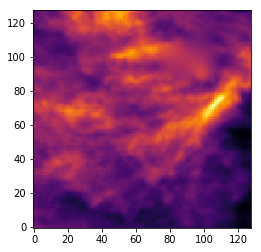

In [29]:
fitsname = "GHIGLS_NCPL_Tb_INPAINTED_UNCUT.fits"
hdu5 = fits.open(fitsname)
hdr5 = hdu5[0].header

cube = hdu5[0].data[0][225:360,238:366, 189:317]
#cube = hdu5[0].data[0]

#The data from the cube was plotted

plt.imshow(np.sum(cube,0), origin="lower", cmap="inferno")
#plt.savefig('NCPL_mosaic_masked.png')
plt.show()
